<a href="https://colab.research.google.com/github/faridaarum/Unsupervised-Learning-/blob/main/Cased_Based_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FARIDA ARUM PARWATI


1301204127 (IF4408)

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# library untuk preprocessing
# Untuk data imputation
from sklearn.impute import SimpleImputer

In [ ]:
#Read Data
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/water-treatment/water-treatment.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5


In [ ]:
df = df.drop(columns=[0]) 

In [ ]:
#Memberi nama untuk setiap kolom
X_columns=["Q-E","ZN-E","PH-E","DBO-E","DQO-E","SS-E","SSV-E","SED-E","COND-E",
           "PH-P","DBO-P","SS-P","SSV-P","SED-P","COND-P","PH-D","DBO-D","DQO-D",
           "SS-D","SSV-D","SED-D","COND-D","PH-S","DBO-S","DQO-S","SS-S","SSV-S",
           "SED-S","COND-S","RD-DBO-P","RD-SS-P","RD-SED-P","RD-DBO-S","RD-DQO-S",
           "RD-DBO-G","RD-DQO-G","RD-SS-G","RD-SED-G"]

In [ ]:
df.columns = X_columns
df.head()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,44101,1.50,7.8,?,407,166,66.3,4.5,2110,7.9,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,39024,3.00,7.7,?,443,214,69.2,6.5,2660,7.7,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,32229,5.00,7.6,?,528,186,69.9,3.4,1666,7.7,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,35023,3.50,7.9,205,588,192,65.6,4.5,2430,7.8,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,36924,1.50,8.0,242,496,176,64.8,4.0,2110,7.9,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Q-E       527 non-null    object 
 1   ZN-E      527 non-null    object 
 2   PH-E      527 non-null    float64
 3   DBO-E     527 non-null    object 
 4   DQO-E     527 non-null    object 
 5   SS-E      527 non-null    object 
 6   SSV-E     527 non-null    object 
 7   SED-E     527 non-null    object 
 8   COND-E    527 non-null    int64  
 9   PH-P      527 non-null    float64
 10  DBO-P     527 non-null    object 
 11  SS-P      527 non-null    int64  
 12  SSV-P     527 non-null    object 
 13  SED-P     527 non-null    object 
 14  COND-P    527 non-null    int64  
 15  PH-D      527 non-null    float64
 16  DBO-D     527 non-null    object 
 17  DQO-D     527 non-null    object 
 18  SS-D      527 non-null    object 
 19  SSV-D     527 non-null    object 
 20  SED-D     527 non-null    object

In [ ]:
df.describe()

,PH-E,COND-E,PH-P,SS-P,COND-P,PH-D,COND-D
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,7.810057,1478.620493,7.829981,253.952562,1496.034156,7.811954,1490.569260
std,0.246175,394.898019,0.226925,147.458468,402.588656,0.199594,399.990816
min,6.900000,651.000000,7.300000,104.000000,646.000000,7.100000,85.000000
25%,7.600000,1201.000000,7.700000,184.000000,1217.000000,7.700000,1225.500000
50%,7.800000,1406.000000,7.800000,220.000000,1420.000000,7.800000,1428.000000
75%,8.000000,1672.000000,8.000000,272.000000,1713.500000,7.900000,1701.000000
max,8.700000,3230.000000,8.500000,1692.000000,3170.000000,8.400000,3690.000000


In [ ]:
#Menampilkan kolom mana saja yang memiliki missing value (“?”)
df.columns[df.isin(['?']).any()]

Index(['Q-E', 'ZN-E', 'DBO-E', 'DQO-E', 'SS-E', 'SSV-E', 'SED-E', 'DBO-P',
       'SSV-P', 'SED-P', 'DBO-D', 'DQO-D', 'SS-D', 'SSV-D', 'SED-D', 'PH-S',
       'DBO-S', 'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-DBO-P',
       'RD-SS-P', 'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 'RD-DBO-G', 'RD-DQO-G',
       'RD-SS-G', 'RD-SED-G'],
      dtype='object')

In [ ]:
#Mengganti missing value (“?”) dengan NaN dan menampilkan 5 data teratas
df = df.replace('?',np.nan)
df.head()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,44101,1.50,7.8,NaN,407,166,66.3,4.5,2110,7.9,...,2000,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
1,39024,3.00,7.7,NaN,443,214,69.2,6.5,2660,7.7,...,2590,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100
2,32229,5.00,7.6,NaN,528,186,69.9,3.4,1666,7.7,...,1888,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,35023,3.50,7.9,205,588,192,65.6,4.5,2430,7.8,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,36924,1.50,8.0,242,496,176,64.8,4.0,2110,7.9,...,2120,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5


In [ ]:
#Membuat array yang berisi kolom yang terdapat missing value dan 
#jumlah missing value pada kolom tersebut

null = []
for i in df:
  value = []
  if df[i].isna().sum() > 0:
    value = [i,df[i].isna().sum()]
    null.append(value)

In [ ]:
print(null)

[['Q-E', 18], ['ZN-E', 3], ['DBO-E', 23], ['DQO-E', 6], ['SS-E', 1], ['SSV-E', 11], ['SED-E', 25], ['DBO-P', 40], ['SSV-P', 11], ['SED-P', 24], ['DBO-D', 28], ['DQO-D', 9], ['SS-D', 2], ['SSV-D', 13], ['SED-D', 25], ['PH-S', 1], ['DBO-S', 23], ['DQO-S', 18], ['SS-S', 5], ['SSV-S', 17], ['SED-S', 28], ['COND-S', 1], ['RD-DBO-P', 62], ['RD-SS-P', 4], ['RD-SED-P', 27], ['RD-DBO-S', 40], ['RD-DQO-S', 26], ['RD-DBO-G', 36], ['RD-DQO-G', 25], ['RD-SS-G', 8], ['RD-SED-G', 31]]


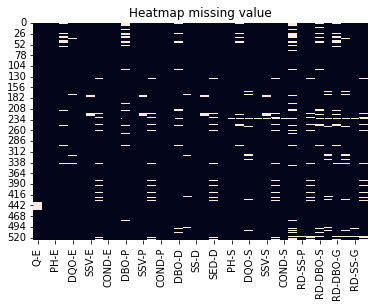

In [ ]:
#Menampilkan missing value pada data.
sns.heatmap(df.isnull(),cbar=False, linecolor='green' )
plt.title("Heatmap missing value")
plt.show()

In [ ]:
#Membuat array yang berisi kolom mana saja yang terdapat missing value
null = []
for i in df:
  if df[i].isna().sum() > 0:
    null.append(i)
    

In [ ]:
print(null)

['Q-E', 'ZN-E', 'DBO-E', 'DQO-E', 'SS-E', 'SSV-E', 'SED-E', 'DBO-P', 'SSV-P', 'SED-P', 'DBO-D', 'DQO-D', 'SS-D', 'SSV-D', 'SED-D', 'PH-S', 'DBO-S', 'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-DBO-P', 'RD-SS-P', 'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 'RD-DBO-G', 'RD-DQO-G', 'RD-SS-G', 'RD-SED-G']


Mengisi missing value menggunakan rata-rata data menggunakan informasi
kolom mana saja yang memiliki missing value yang terdapat pada array null.
serta, menampilkan 5 data teratas setelah missing value digantikan dengan nilai
rata-rata.

In [ ]:
imputer = SimpleImputer(strategy = 'mean', missing_values = np.nan)

In [ ]:
df[null] = imputer.fit_transform(df[null])

In [ ]:
df.head()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,44101.0,1.5,7.8,188.714286,407.0,166.0,66.3,4.5,2110,7.9,...,2000.0,39.085806,58.8,95.5,83.448049,70.0,89.013646,79.4,87.3,99.6
1,39024.0,3.0,7.7,188.714286,443.0,214.0,69.2,6.5,2660,7.7,...,2590.0,39.085806,60.7,94.8,83.448049,80.8,89.013646,79.5,92.1,100.0
2,32229.0,5.0,7.6,188.714286,528.0,186.0,69.9,3.4,1666,7.7,...,1888.0,39.085806,58.2,95.6,83.448049,52.9,89.013646,75.8,88.7,98.5
3,35023.0,3.5,7.9,205.000000,588.0,192.0,65.6,4.5,2430,7.8,...,1840.0,33.100000,64.2,95.3,87.300000,72.3,90.200000,82.3,89.6,100.0
4,36924.0,1.5,8.0,242.000000,496.0,176.0,64.8,4.0,2110,7.9,...,2120.0,39.085806,62.7,95.6,83.448049,71.0,92.100000,78.2,87.5,99.5


In [ ]:
df.isna().sum()

Q-E         0
ZN-E        0
PH-E        0
DBO-E       0
DQO-E       0
SS-E        0
SSV-E       0
SED-E       0
COND-E      0
PH-P        0
DBO-P       0
SS-P        0
SSV-P       0
SED-P       0
COND-P      0
PH-D        0
DBO-D       0
DQO-D       0
SS-D        0
SSV-D       0
SED-D       0
COND-D      0
PH-S        0
DBO-S       0
DQO-S       0
SS-S        0
SSV-S       0
SED-S       0
COND-S      0
RD-DBO-P    0
RD-SS-P     0
RD-SED-P    0
RD-DBO-S    0
RD-DQO-S    0
RD-DBO-G    0
RD-DQO-G    0
RD-SS-G     0
RD-SED-G    0
dtype: int64

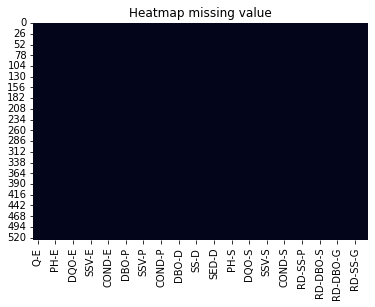

In [ ]:
sns.heatmap(df.isnull(),cbar=False)
plt.title("Heatmap missing value")
plt.show()

In [ ]:
df.shape

(527, 38)

In [ ]:
#Pengecekan adanya duplikasi data pada dataset. Terlihat bahwa tidak adanya
#duplikasi yang ada pada dataset.
bool_series = df.duplicated()
print(bool_series)
print(type(bool_series))
bool_series.value_counts()

0      False
1      False
2      False
3      False
4      False
       ...  
522    False
523    False
524    False
525    False
526    False
Length: 527, dtype: bool
<class 'pandas.core.series.Series'>


False    527
dtype: int64

Uji outlier merupakan kondisi observasi dari suatu data memiliki karakteristik unik yang terlihat sangat berbeda dengan data lainnya. Apabila terjadi outliers data tesebut dapat dikeluarkan dari analisis.

In [ ]:
#melakukan perhitungan ouliers

def hitungOutliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

    


In [ ]:
for i in df:
  outliers = hitungOutliers(df[i])
  percentage = len(outliers)/len(df[i])*100
  print(i)
  print("number of outliers: " + str(len(outliers)))
  print("max outlier value: " + str(outliers.max()))
  print("min outlier value: " + str(outliers.min()))
  print("Outliers percentage: "+ str(float(f'{percentage:.2f}'))+"%")
  print()

Q-E
number of outliers: 12
max outlier value: 60081.0
min outlier value: 10050.0
Outliers percentage: 2.28%

ZN-E
number of outliers: 33
max outlier value: 33.5
min outlier value: 6.2
Outliers percentage: 6.26%

PH-E
number of outliers: 2
max outlier value: 8.7
min outlier value: 6.9
Outliers percentage: 0.38%

DBO-E
number of outliers: 16
max outlier value: 438.0
min outlier value: 31.0
Outliers percentage: 3.04%

DQO-E
number of outliers: 12
max outlier value: 941.0
min outlier value: 81.0
Outliers percentage: 2.28%

SS-E
number of outliers: 39
max outlier value: 2008.0
min outlier value: 352.0
Outliers percentage: 7.4%

SSV-E
number of outliers: 24
max outlier value: 34.3
min outlier value: 13.2
Outliers percentage: 4.55%

SED-E
number of outliers: 11
max outlier value: 36.0
min outlier value: 9.0
Outliers percentage: 2.09%

COND-E
number of outliers: 15
max outlier value: 3230
min outlier value: 2390
Outliers percentage: 2.85%

PH-P
number of outliers: 1
max outlier value: 8.5
min 

In [ ]:
column = df.columns

In [ ]:
print(column)

Index(['Q-E', 'ZN-E', 'PH-E', 'DBO-E', 'DQO-E', 'SS-E', 'SSV-E', 'SED-E',
       'COND-E', 'PH-P', 'DBO-P', 'SS-P', 'SSV-P', 'SED-P', 'COND-P', 'PH-D',
       'DBO-D', 'DQO-D', 'SS-D', 'SSV-D', 'SED-D', 'COND-D', 'PH-S', 'DBO-S',
       'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-DBO-P', 'RD-SS-P',
       'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 'RD-DBO-G', 'RD-DQO-G', 'RD-SS-G',
       'RD-SED-G'],
      dtype='object')


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

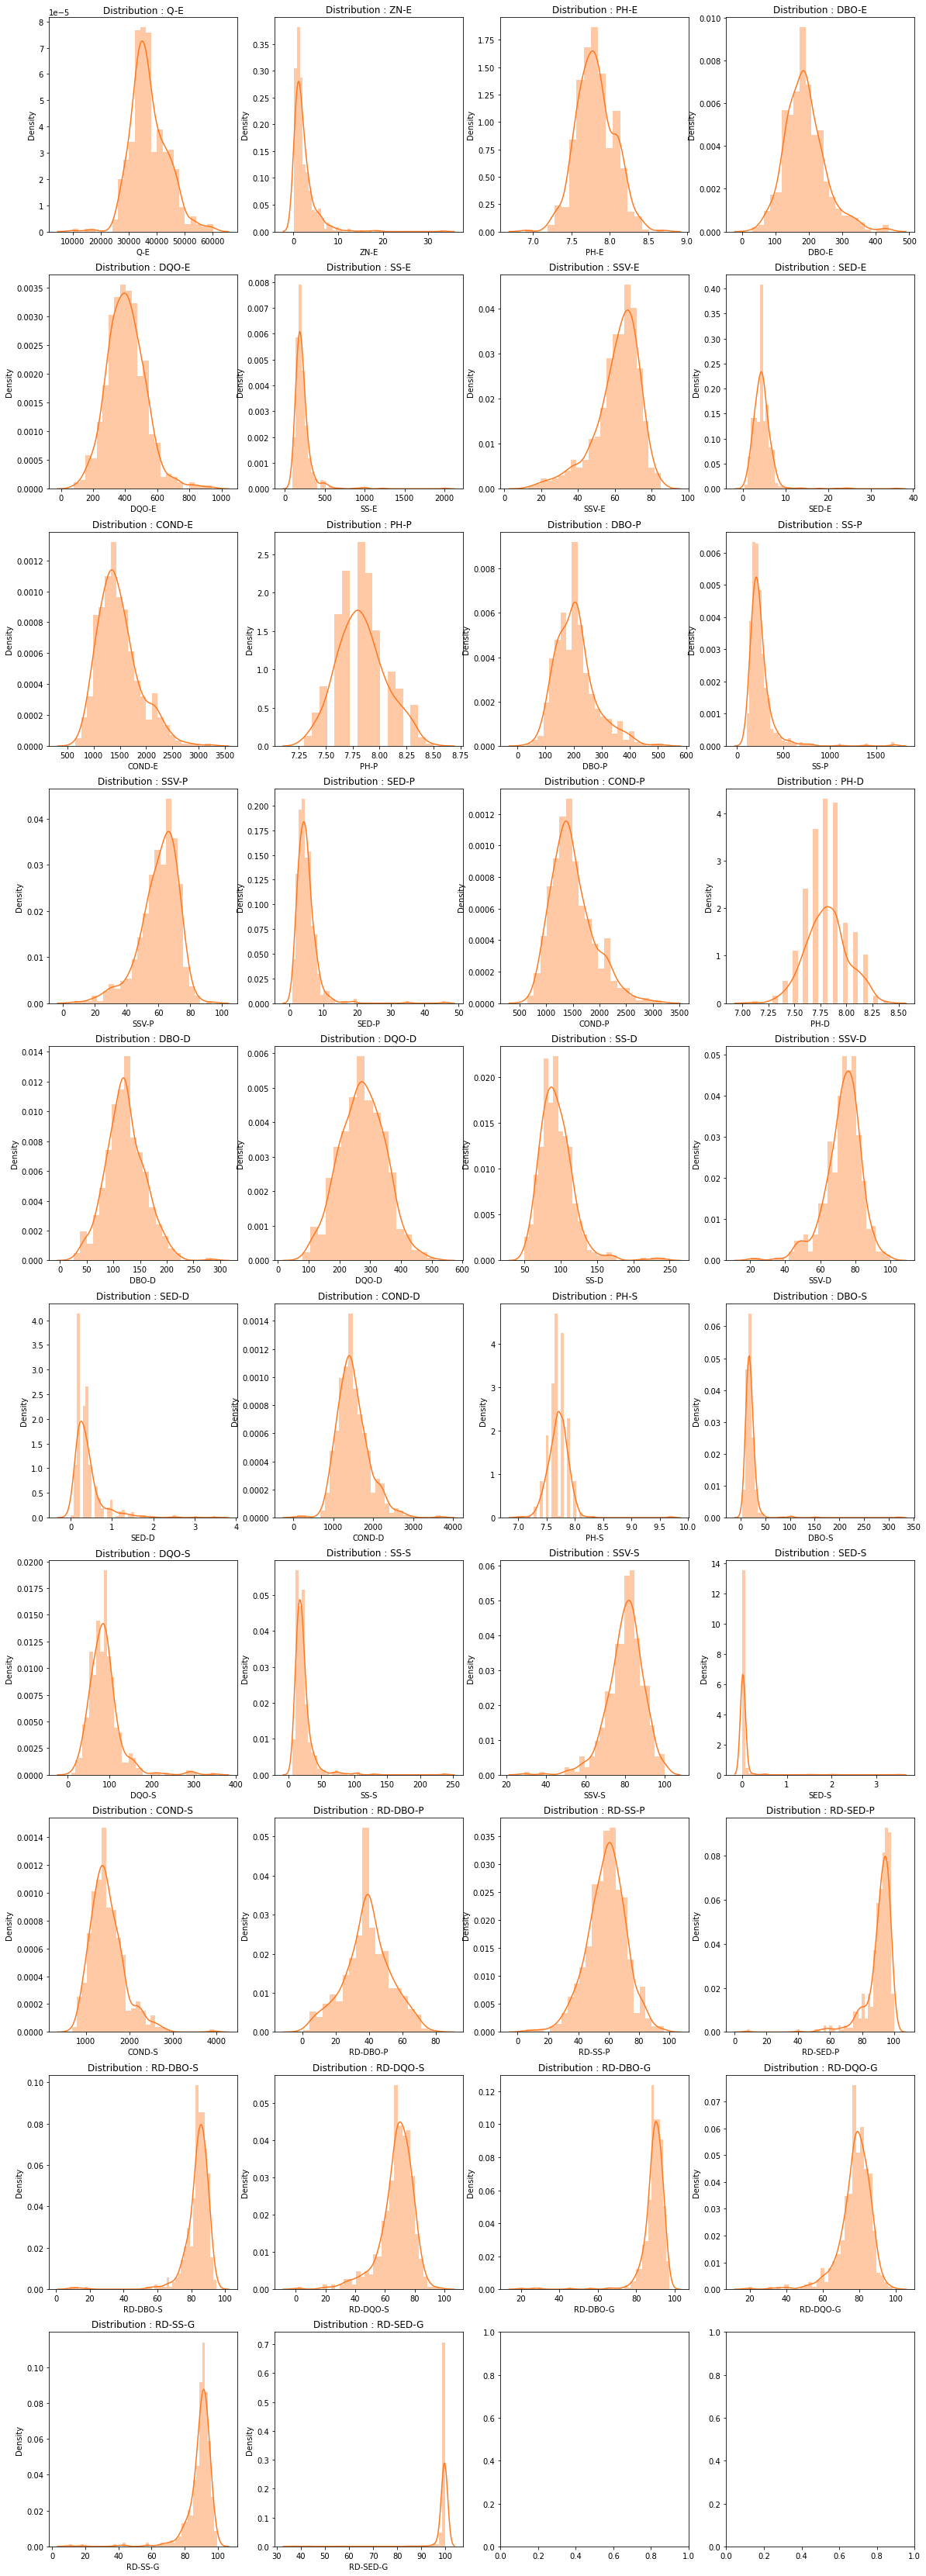

In [ ]:
colors = ['#FF781F','#2D2926']
fig, ax = plt.subplots(nrows = 10,ncols = 4,figsize = (20,60))
for i in range(len(column)):
    plt.subplot(10,4,i+1)
    sns.distplot(df[column[i]],color = colors[0])
    title = 'Distribution : ' + column[i]
    plt.title(title)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Q-E       527 non-null    float64
 1   ZN-E      527 non-null    float64
 2   PH-E      527 non-null    float64
 3   DBO-E     527 non-null    float64
 4   DQO-E     527 non-null    float64
 5   SS-E      527 non-null    float64
 6   SSV-E     527 non-null    float64
 7   SED-E     527 non-null    float64
 8   COND-E    527 non-null    int64  
 9   PH-P      527 non-null    float64
 10  DBO-P     527 non-null    float64
 11  SS-P      527 non-null    int64  
 12  SSV-P     527 non-null    float64
 13  SED-P     527 non-null    float64
 14  COND-P    527 non-null    int64  
 15  PH-D      527 non-null    float64
 16  DBO-D     527 non-null    float64
 17  DQO-D     527 non-null    float64
 18  SS-D      527 non-null    float64
 19  SSV-D     527 non-null    float64
 20  SED-D     527 non-null    float6

Melakukan Pemisahan data yang akan diolah. pada proses ini, akan digunakan
data berupa output yaitu PH-S, DBO-S, DQO-S, SS-S, SSV-S,SED-S, dan
COND-S. akan ditampilkan data yang siap diolah

In [ ]:
features = ["PH-S", "DBO-S","DQO-S", "SS-S", "SSV-S", "SED-S","COND-S"]

In [ ]:
df = df.dropna(subset=features)

In [ ]:
data = df[features].copy()

In [ ]:
data

,PH-S,DBO-S,DQO-S,SS-S,SSV-S,SED-S,COND-S
0,7.3,19.988095,84.0,21.0,81.0,0.020000,2000.0
1,7.5,19.988095,91.0,17.0,94.1,0.000000,2590.0
2,7.6,19.988095,128.0,21.0,81.0,0.050000,1888.0
3,7.6,20.000000,104.0,20.0,96.7,0.000000,1840.0
4,7.6,19.000000,108.0,22.0,65.9,0.020000,2120.0
...,...,...,...,...,...,...,...
522,7.9,19.000000,54.0,6.0,100.0,0.010000,942.0
523,7.9,17.000000,88.0,16.0,90.0,0.000000,950.0
524,7.7,25.000000,84.0,20.0,84.0,0.020000,1136.0
525,7.7,21.000000,71.0,27.0,71.1,0.010000,1326.0


# PESUDOCODE

1. Scale the data 
2. Initialize random centroids
3. Label each data point 
4. update centoids
5. repeat steps 3 and 4 until centroids stop changing

SCALE THE DATA

Data scaling atau normalisasi data merupakan teknik mengubah nilai numerik
dalam dataset ke skala umum, tanpa mendistorsi perbedaan dalam rentang nilai.
pada kasus ini digunakan skala minimum 1 dan maksimum 10. Tujuan dari
scaling data adalah agar tahan terhadap pencilan data (outliers).

In [ ]:
data = (data - data.min()) / (data.max() - data.min()) * 9 + 1

In [ ]:
data.describe()

,PH-S,DBO-S,DQO-S,SS-S,SSV-S,SED-S,COND-S
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,3.366286,1.482312,3.066429,1.629831,7.476919,1.095334,3.236412
std,0.623924,0.488338,1.012262,0.630744,1.145065,0.492425,1.067596
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,1.312303,2.478006,1.310345,6.841102,1.000000,2.520661
50%,3.333333,1.425868,3.005865,1.504310,7.533898,1.051429,3.066116
75%,3.666667,1.539432,3.401760,1.698276,8.182203,1.051429,3.778237
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
data.head()

,PH-S,DBO-S,DQO-S,SS-S,SSV-S,SED-S,COND-S
0,2.000000,1.482312,2.979472,1.581897,7.584746,1.051429,4.628099
1,2.666667,1.482312,3.164223,1.426724,9.250000,1.000000,6.253444
2,3.000000,1.482312,4.140762,1.581897,7.584746,1.128571,4.319559
3,3.000000,1.482650,3.507331,1.543103,9.580508,1.000000,4.187328
4,3.000000,1.454259,3.612903,1.620690,5.665254,1.051429,4.958678


INITIALIZED RANDOM CENTROIDS

Inisiasi ini dilakukan untuk menentukan banyaknya nilai centroid nantinya akan
tergantung pada seberapa banyak cluster yang ingin dihasilkan yaitu pada nilai k.
centroid akan diletakkan pada array centroids.

In [ ]:
def random_centroids(data, k):
  centroids = []
  for i in range(k):
    centroid = data.apply(lambda x: float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids, axis=1)

In [ ]:
centroids = random_centroids(data, 5)

In [ ]:
centroids

,0,1,2,3,4
PH-S,3.000000,3.000000,4.000000,2.666667,3.666667
DBO-S,1.170347,1.511041,1.511041,1.312303,1.709779
DQO-S,3.560117,3.032258,3.296188,3.005865,2.451613
SS-S,1.620690,1.426724,1.853448,1.814655,1.193966
SSV-S,8.411017,8.144068,6.364407,8.385593,6.822034
SED-S,1.025714,1.000000,1.051429,1.025714,1.051429
COND-S,2.608815,3.746556,2.876033,2.559229,2.972452


LABEL EACH DATA POINT

Pemberian label ini bertujuan untuk memisahkan tiap data yang nantinya akan di
clustering. Setiap data akan dibeli label dan dipisahkan menurut kelompok data ke
dalam cluster yang dengan jarak yang paling pendek. Ada 5 label, yaitu 0, 1 ,2, 3,
dan 4.

In [ ]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [ ]:
labels = get_labels(data, centroids)

In [ ]:
labels.value_counts()

1    168
4    120
2    101
0     72
3     66
dtype: int64

In [ ]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

UPDATE CENTROIDS

pembaruan centroid ini dilakukan setelah tiap data diberi label, sehingga secara
otomatis centroid juga akan berubah.

In [ ]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

REPEAT THE ALGORITHMS UNTIL CENTROIDS STOP CHANGING


Pengulangan langkah ini dapat diperoleh dengan melakukan pengulangan
hingga nilai centroid tidak berubah lagi. Pengulangan ini bertujuan diperolehnya
jarak terdekat dari suatu data ke sebuah titik tengah. pada tahap ini, diinisiasi
untuk maksimum iterasinya adalah 100 dan jumlah centroid nya adalah berjumlah
3 centroid. Didapatkan pada iterasi ke 13 (nilai iterasi setiap run dapat berbeda)
nilai centroid tidak berubah lagi, yg artinya proses clustering telah berhasil
dilakukan.

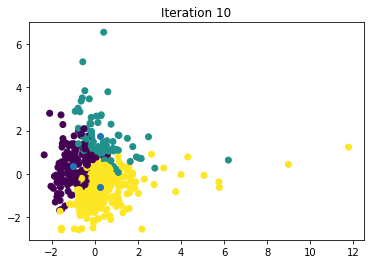

In [ ]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [ ]:
centroids


,0,1,2
PH-S,3.442129,3.374775,3.221836
DBO-S,1.355878,1.401856,1.518814
DQO-S,2.357889,3.137826,3.258135
SS-S,1.440038,1.550502,1.645222
SSV-S,7.087324,5.703450,8.074814
SED-S,1.056422,1.053328,1.077966
COND-S,2.304845,3.991095,3.373387


In [ ]:
labels.value_counts()

2    287
0    162
1     78
dtype: int64

In [ ]:
data[labels == 0]

,PH-S,DBO-S,DQO-S,SS-S,SSV-S,SED-S,COND-S
16,2.000000,1.312303,1.000000,1.543103,7.775424,1.000000,2.980716
26,2.666667,1.482312,2.741935,1.543103,6.822034,1.128571,2.911846
27,2.666667,1.454259,2.530792,1.698276,7.877119,1.000000,2.479339
28,2.333333,1.454259,2.847507,1.853448,7.711864,1.000000,2.112948
41,3.000000,1.567823,2.636364,2.047414,7.292373,1.051429,2.809917
...,...,...,...,...,...,...,...
520,4.000000,1.227129,2.187683,1.310345,7.826271,1.000000,1.994490
521,3.333333,1.624606,3.269795,1.775862,7.063559,1.095334,1.785124
524,3.333333,1.624606,2.979472,1.543103,7.966102,1.051429,2.247934
525,3.333333,1.511041,2.636364,1.814655,6.326271,1.025714,2.771350


In [ ]:
from sklearn.cluster import KMeans 

In [ ]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

# Comparing the implementation to scikit-learn

Berikut adalah hasil membandingkan output centroid algoritma k means yang
sudah dibuat dengan output centroid algoritma k means yang menggunakan library. dapat
dilihat bahwa perbandingan penggunaan kedua algoritma tidaklah jauh berbeda.

In [ ]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
PH-S,3.458988,3.325279,2.888889
DBO-S,1.405190,1.459107,3.962108
DQO-S,2.840290,3.065151,7.912023
SS-S,1.548480,1.585539,4.965517
SSV-S,6.367572,8.127050,7.398305
SED-S,1.072385,1.050182,3.222857
COND-S,2.964086,3.393601,3.304561


In [ ]:
centroids

,0,1,2
PH-S,3.442129,3.374775,3.221836
DBO-S,1.355878,1.401856,1.518814
DQO-S,2.357889,3.137826,3.258135
SS-S,1.440038,1.550502,1.645222
SSV-S,7.087324,5.703450,8.074814
SED-S,1.056422,1.053328,1.077966
COND-S,2.304845,3.991095,3.373387
